In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium

In [2]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

### 전체 반려동물 등록수

In [3]:
df_pet = pd.read_csv('C:/Users/jun/Desktop/workspace/반려동물등록현황.csv', encoding='cp949', engine='python' )
df_pet.head()

,시군명,읍면동명,등록동물수(마리),(등록주체)시군구등록,(등록주체)대행업체등록,(등록주체)기타,(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표,등록품종수,등록소유자수,동물소유자당등록동물수,해당동의등록대행업체수,데이터기준일자
0,가평군,가평읍,941,NaN,NaN,NaN,596,294,51,NaN,85,NaN,3.0,2021-06-28
1,가평군,북면,289,NaN,NaN,NaN,176,93,20,NaN,185,NaN,0.0,2021-06-28
2,가평군,상면,399,NaN,NaN,NaN,217,153,29,NaN,243,NaN,0.0,2021-06-28
3,가평군,설악면,1111,NaN,NaN,NaN,446,612,53,NaN,625,NaN,1.0,2021-06-28
4,가평군,조종면,416,NaN,NaN,NaN,218,161,37,NaN,274,NaN,1.0,2021-06-28


In [35]:
df_pet['시군명'].unique()

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '의왕시', '의정부시', '이천시', '파주시', '평택시',
       '포천시', '하남시', '화성시'], dtype=object)

In [36]:
local_df = df_pet[['시군명','등록동물수(마리)']]
local_df

,시군명,등록동물수(마리)
0,가평군,941
1,가평군,289
2,가평군,399
3,가평군,1111
4,가평군,416
...,...,...
567,화성시,3107
568,화성시,3107
569,화성시,15
570,화성시,36


In [37]:
new_df = local_df.groupby(local_df['시군명']).sum()
new_df

,등록동물수(마리)
시군명,
가평군,4017
고양시,61553
과천시,3428
광명시,18323
광주시,17613
구리시,8664
군포시,13372
김포시,7912
남양주시,34136


In [82]:
pet_df = new_df.rename(columns={'등록동물수(마리)':'등록동물'})
pet_df

,등록동물
시군명,
가평군,4017
고양시,61553
과천시,3428
광명시,18323
광주시,17613
구리시,8664
군포시,13372
김포시,7912
남양주시,34136


--------------------------------

### 시군별 인구수

In [61]:
df_pop = pd.read_csv('C:/Users/jun/Desktop/workspace/주민등록인구집계현황.csv', encoding='cp949', engine='python' )
df_pop.head()

,연도,월,행정구역구분명,행정구역명,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,...,10~19세 (여),20~29세 (여),30~39세 (여),40~49세 (여),50~59세 (여),60~69세 (여),70~79세 (여),80~89세 (여),90~99세 (여),100세 이상 (여)
0,2021,4,도,경기도,13479798,1130520,1325369,1812656,1901856,2298715,...,643946,857829,920627,1129442,1106006,798241,418456,226928,40406,1821
1,2021,4,시군,경기도 가평군,62206,3282,4561,6213,5602,7848,...,2158,2637,2558,3624,5259,5996,3569,2286,383,22
2,2021,4,읍면동,경기도 가평군 가평읍,19426,1123,1658,2196,1865,2626,...,753,993,884,1217,1610,1664,1047,698,109,12
3,2021,4,읍면동,경기도 가평군 북면,3907,151,200,246,264,399,...,92,107,115,171,312,488,287,209,35,3
4,2021,4,읍면동,경기도 가평군 상면,5617,151,293,537,373,554,...,127,181,164,236,546,679,368,243,39,1


In [62]:
df_pop['행정구역구분명'].unique()

array(['도', '시군', '읍면동', '구'], dtype=object)

In [63]:
local_df = df_pop[['월', '행정구역구분명', '행정구역명', '총 인구수']]
local_df

,월,행정구역구분명,행정구역명,총 인구수
0,4,도,경기도,13479798
1,4,시군,경기도 가평군,62206
2,4,읍면동,경기도 가평군 가평읍,19426
3,4,읍면동,경기도 가평군 북면,3907
4,4,읍면동,경기도 가평군 상면,5617
...,...,...,...,...
2412,1,읍면동,경기도 화성시 팔탄면,9974
2413,1,읍면동,경기도 화성시 향남읍,86246
2414,1,읍면동,경기도 화성시 화산동,23199
2415,1,읍면동,경기도 화성시동부출장소,0


In [64]:
state_a = local_df['행정구역구분명'] == '시군'
state_b = local_df['월'] == 4 

state_df = local_df[state_a & state_b]

In [65]:
state_df  #4월 기준 인구수

,월,행정구역구분명,행정구역명,총 인구수
1,4,시군,경기도 가평군,62206
8,4,시군,경기도 고양시,1080736
51,4,시군,경기도 과천시,68955
58,4,시군,경기도 광명시,295690
77,4,시군,경기도 광주시,383794
91,4,시군,경기도 구리시,195324
100,4,시군,경기도 군포시,271007
112,4,시군,경기도 김포시,481719
127,4,시군,경기도 남양주시,721767
145,4,시군,경기도 동두천시,93289


In [66]:
pop_df = state_df[['행정구역명','총 인구수']]

In [67]:
pop_df

,행정구역명,총 인구수
1,경기도 가평군,62206
8,경기도 고양시,1080736
51,경기도 과천시,68955
58,경기도 광명시,295690
77,경기도 광주시,383794
91,경기도 구리시,195324
100,경기도 군포시,271007
112,경기도 김포시,481719
127,경기도 남양주시,721767
145,경기도 동두천시,93289


In [68]:
pop_df['행정구역명'] = pop_df['행정구역명'].str.split(" ").str[1]

<ipython-input-68-9bbf546a173f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df['행정구역명'] = pop_df['행정구역명'].str.split(" ").str[1]


In [69]:
pop_df

,행정구역명,총 인구수
1,가평군,62206
8,고양시,1080736
51,과천시,68955
58,광명시,295690
77,광주시,383794
91,구리시,195324
100,군포시,271007
112,김포시,481719
127,남양주시,721767
145,동두천시,93289


In [74]:
popf_df = pop_df.rename(columns={'행정구역명':'시군명'})
popf_df

,시군명,총 인구수
1,가평군,62206
8,고양시,1080736
51,과천시,68955
58,광명시,295690
77,광주시,383794
91,구리시,195324
100,군포시,271007
112,김포시,481719
127,남양주시,721767
145,동두천시,93289


-----------------------------

### 등록대행 업체

In [24]:
df_store= pd.read_csv('C:/Users/jun/Desktop/workspace/반려동물등록대행업체현황.csv', encoding='cp949', engine='python' )
df_store.head()

,시군명,업체명,도로명주소,지번주소,우편번호,전화번호,WGS84위도,WGS84경도
0,가평군,가평가축병원,NaN,경기도 가평군 가평읍 대곡리 230번지 3호,12420.0,031-582-2412,37.825038,127.514124
1,가평군,가평축산농협 동물병원,NaN,경기도 가평군 가평읍 대곡리,NaN,031-582-4111,NaN,NaN
2,가평군,경기 동물병원,경기도 가평군 청평면 청평중앙로 8,경기도 가평군 청평면 청평리 438-23번지 경기동물병원,12453.0,031-584-1282,37.735850,127.415936
3,가평군,선진가축병원(산업동물출장진료전문병원),경기도 가평군 가평읍 향교로 3,경기도 가평군 가평읍 읍내리 535번지 2호,12417.0,070-8739-6388,37.829437,127.510432
4,가평군,설악동물병원,경기도 가평군 설악면 신천중앙로 117,경기도 가평군 설악면 신천리 454번지 3호,12467.0,031-584-3063,37.677960,127.490633


In [52]:
df_store['시군명'].unique()

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시'], dtype=object)

In [53]:
store_df = df_store[['시군명','업체명']]
store_df 

,시군명,업체명
0,가평군,가평가축병원
1,가평군,가평축산농협 동물병원
2,가평군,경기 동물병원
3,가평군,선진가축병원(산업동물출장진료전문병원)
4,가평군,설악동물병원
...,...,...
1204,화성시,향남메디동물병원
1205,화성시,현대동물병원
1206,화성시,호야펫 화성점
1207,화성시,홍익메디칼동물병원


In [124]:
numstore_df = store_df.groupby('시군명').size()
numstore_df

시군명
가평군       8
고양시      99
과천시       6
광명시      22
광주시      26
구리시      24
군포시      14
김포시      49
남양주시     52
동두천시      8
부천시      77
성남시     123
수원시     122
시흥시      38
안산시      52
안성시      10
안양시      46
양주시      37
양평군      13
여주시       6
연천군       2
오산시      22
용인시     110
의왕시      12
의정부시     37
이천시      14
파주시      35
평택시      43
포천시       7
하남시      25
화성시      70
dtype: int64

--------------------

### 인구 대비 등록동물수

In [115]:
df1 = new_df
df2 = popf_df
df3 = numstore_df

In [116]:
rate_pop_pet = pd.merge(df1,df2, how = 'inner', on = '시군명')
rate_pop_pet

,시군명,등록동물수(마리),총 인구수
0,가평군,4017,62206
1,고양시,61553,1080736
2,과천시,3428,68955
3,광명시,18323,295690
4,광주시,17613,383794
5,구리시,8664,195324
6,군포시,13372,271007
7,김포시,7912,481719
8,남양주시,34136,721767
9,동두천시,5464,93289


In [101]:
rate_pop_pet['인구 대비 등록동물수'] = rate_pop_pet['등록동물수(마리)'] / rate_pop_pet['총 인구수']
rate_pop_pet

,시군명,등록동물수(마리),총 인구수,인구 대비 등록동물수
0,가평군,4017,62206,0.064576
1,고양시,61553,1080736,0.056955
2,과천시,3428,68955,0.049714
3,광명시,18323,295690,0.061967
4,광주시,17613,383794,0.045892
5,구리시,8664,195324,0.044357
6,군포시,13372,271007,0.049342
7,김포시,7912,481719,0.016425
8,남양주시,34136,721767,0.047295
9,동두천시,5464,93289,0.058571


Text(0.5, 1.0, '경기도 인구수 대비 등록동물수')

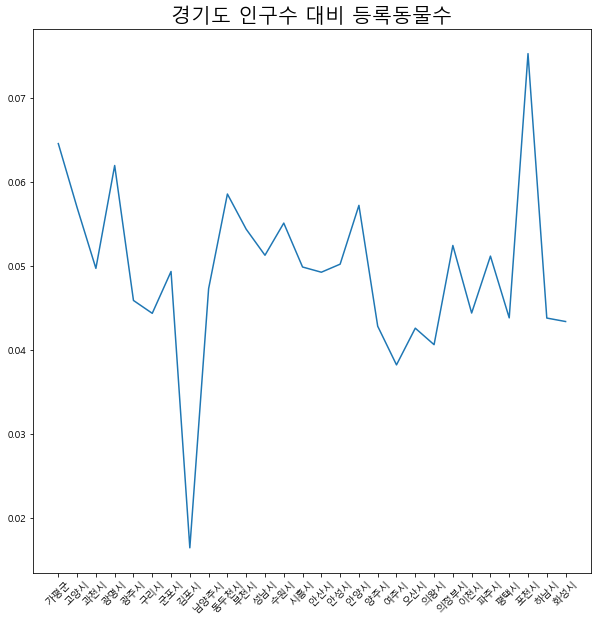

In [113]:
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot()  ## 그림 뼈대(프레임) 생성
 
ax.plot(rate_pop_pet['시군명'],rate_pop_pet['인구 대비 등록동물수']) ## 선그래프 생성
 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('경기도 인구수 대비 등록동물수',fontsize=20) ## 타이틀 설정

------------------

### 대행업체수 대비 등록동물수

In [120]:
df3 = numstore_df

In [123]:
df1

,등록동물수(마리)
시군명,
가평군,4017
고양시,61553
과천시,3428
광명시,18323
광주시,17613
구리시,8664
군포시,13372
김포시,7912
남양주시,34136


In [122]:
rate_store_pet = pd.merge(df1,df3, how = 'inner', on = '시군명')
rate_store_pet

ValueError: Cannot merge a Series without a name

---------------------

### 인구 대비 대행업체수